In [6]:
from jax import random
import jax.numpy as jnp

shapes = [(2, 3), (3, 4), (4, 5)]

key = random.PRNGKey(0)
key, key_params, key_dropout, *key_input = random.split(key, 3+len(shapes))

# key, k1, *k2 = random.split(key, 5)
# print(key, k1, k2)

inputs = (random.normal(key_input[i], shapes[i]) for i in range(len(shapes)))
[*inputs]

[Array([[ 0.2635195 , -0.39445236, -0.24861199],
        [-0.80041754, -0.26545465,  0.10730603]], dtype=float32),
 Array([[-1.2844197, -1.3027563, -2.5032926, -1.6073095],
        [ 0.3695053,  0.6026782, -1.0474607, -0.8197166],
        [ 1.0973094, -0.9718918, -0.9393934,  1.32194  ]], dtype=float32),
 Array([[ 1.8831015 , -0.68776417, -1.1891812 ,  0.06842102,  0.20042913],
        [ 0.46550485, -0.18042372,  0.26481786,  0.72486967, -0.9045706 ],
        [ 0.6109341 , -0.26189703, -0.76770043, -1.2548885 , -1.6656276 ],
        [-1.0918932 , -0.17711541,  1.7757137 ,  1.0980866 ,  0.97356826]],      dtype=float32)]

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import generate_data as gd
import util as u
N = u.N[:2]

In [16]:
plt.imshow(jnp.load())
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: 'data_t/grad_ATT_masks.npy'

In [ ]:

angles = jnp.linspace(0, 360, u.NUM_LIGHTING_ANGLES, endpoint=False)
# angles = np.random.uniform(0, 360, u.NUM_LIGHTING_ANGLES)
e = jnp.ones((N[0]-12, N[1]-12))

# e1 = gd.attenuation_mask_directional_2d(angle, e, .1e-3,70)
e1 = gd.attenuation_mask_directional_2d_vmap(angles, e, .1e-3,70)
# e1 = gd.pad_1_wrapper(e1, 12)


num=6
fig, ax = plt.subplots(1, num, figsize=(num, 1))
for i in range(num):
    im_a = ax[i].imshow(e1[i], aspect="equal")
    im_a.set_clim(jnp.min(e1), jnp.max(e1))
    ax[i].axis("off")
plt.colorbar(im_a, ax=ax)


In [27]:
ap =20.1
fr=.18
l=500
bm=.638
ap*(fr*(l/500)**-4+(1-fr)*(l/500)**bm)/10

2.0100000000000002

In [53]:
u.N[0]-2*u.PML_MARGIN[0]

104

[-0.01045007 -0.01034086 -0.0102328  -0.01012587 -0.01002005 -0.00991534
 -0.00981172 -0.00970919 -0.00960773 -0.00950733 -0.00940797 -0.00930966
 -0.00921237 -0.0091161  -0.00902084 -0.00892657 -0.00883329 -0.00874098
 -0.00864964 -0.00855925 -0.0084698  -0.00838129 -0.00829371 -0.00820704
 -0.00812127 -0.00803641 -0.00795242 -0.00786932 -0.00778709 -0.00770571
 -0.00762519 -0.0075455  -0.00746665 -0.00738862 -0.00731141 -0.00723501
 -0.0071594  -0.00708459 -0.00701055 -0.00693729 -0.0068648  -0.00679306
 -0.00672207 -0.00665182 -0.00658231 -0.00651353 -0.00644546 -0.0063781
 -0.00631145 -0.0062455  -0.00618023 -0.00611565 -0.00605174 -0.0059885
 -0.00592592 -0.00586399 -0.00580271 -0.00574207 -0.00568207 -0.00562269
 -0.00556393 -0.00550579 -0.00544825 -0.00539132 -0.00533498 -0.00527923
 -0.00522406 -0.00516947 -0.00511545 -0.00506199 -0.00500909 -0.00495675
 -0.00490495 -0.00485369 -0.00480297 -0.00475278 -0.00470311 -0.00465396
 -0.00460533 -0.0045572  -0.00450958 -0.00446246 -0.0

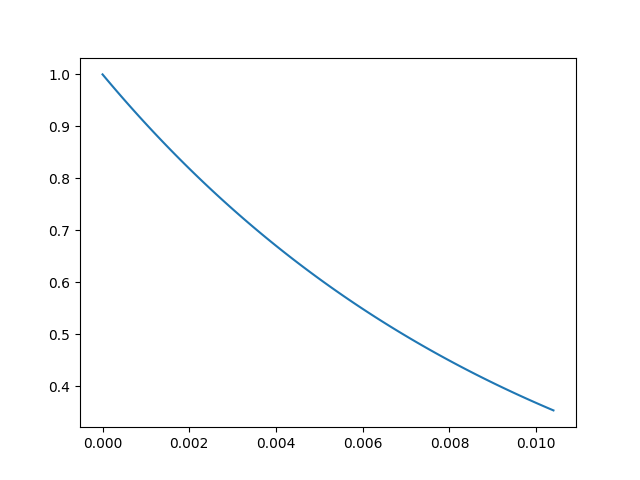

(array([], dtype=int64),)

In [87]:
xs = np.linspace(0,(u.N[0]-2*u.PML_MARGIN[0])*u.DX[0],100)
att = 100
ys = np.exp(-att * xs)

# window of width w in x with the highest difference in y
w = 88
diff = np.diff(ys)
# max_diff = np.min(diff)
print(diff)
# print(np.where((diff<1e-4)))
# one_diff_idx = np.where(diff<-1)


plt.figure()
plt.plot(xs, ys)
plt.show()
one_diff_idx

interactive(children=(IntSlider(value=0, description='angle', max=360), Output()), _dom_classes=('widget-inter…

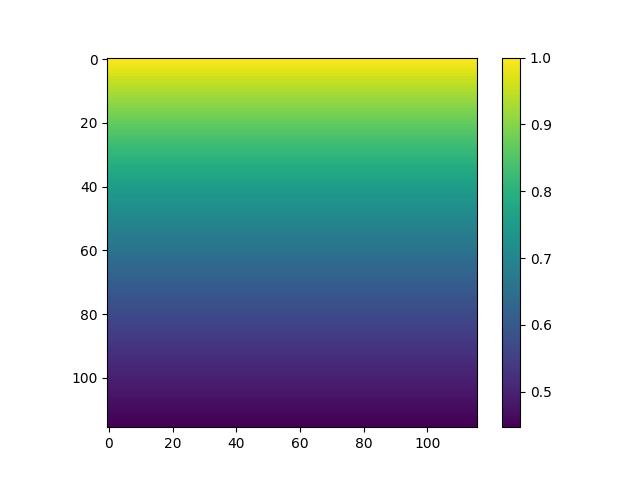

In [33]:
%matplotlib ipympl
from ipywidgets import interact
plt.close('all')
def update(angle):
    dx=.1e-3
    attenuation = 70
    volume = jnp.ones((N[0]-12, N[1]-12))
    angle_rad = jnp.deg2rad(angle)

    ux = jnp.cos(angle_rad)
    uy = jnp.sin(angle_rad)

    height, width = volume.shape
    x_indices = jnp.arange(width)
    y_indices = jnp.arange(height)
    X, Y = jnp.meshgrid(x_indices, y_indices, indexing="ij")

    # ccd = jnp.sqrt((width*dx)**2 + (height*dx)**2)
    # su = ux+uy
    distances = ux * X * dx + uy * Y * dx
    # distances = ux * X * dx*su + uy * Y * dx*su
    # distances = ux * X * dx + uy * Y * dx
    mask = jnp.exp(-attenuation * distances)
    result = mask/jnp.max(mask) * volume
    return result


@interact(angle=(0, 360, 1))
def plot(angle=0):
    mask = update(angle)
    im.set_data(mask)
    im.set_clim(jnp.min(mask), jnp.max(mask))
    plt.draw()

mask = update(0)
im = plt.imshow(mask)
plt.colorbar()

In [21]:
50 * 88*1e-3

4.4

In [16]:
import numpy as np
import orbax.checkpoint as ocp
import jax
from flax.training import train_state
import optax

path = ocp.test_utils.erase_and_create_empty('/tmp/my-checkpoints/')

tx = optax.adam(1e-3)
my_tree = {
    's1': train_state.TrainState.create(apply_fn=None, params={'a': np.ones(3)}, tx=tx),
    's2': train_state.TrainState.create(apply_fn=None, params={'a': np.ones(3)*2}, tx=tx),
    'b': {
        'c': 42,
        'd': np.arange(16),
    },
}

abstract_my_tree = jax.tree_util.tree_map(
    ocp.utils.to_shape_dtype_struct, (my_tree['s1']))

# abstract_my_tree
# my_tree


checkpointer = ocp.StandardCheckpointer()
checkpointer.save(path / 's1', my_tree['s1'])
checkpointer.save(path / 's2', my_tree['s2'])

checkpointer.restore(
    path / 's1',
    args=ocp.args.StandardRestore(abstract_my_tree)
)
checkpointer.restore(
    path / 's2',
    args=ocp.args.StandardRestore(abstract_my_tree)
)

TrainState(step=0, apply_fn=None, params={'a': array([2., 2., 2.])}, tx=GradientTransformationExtraArgs(init=<function chain.<locals>.init_fn at 0x7fb272ba6160>, update=<function chain.<locals>.update_fn at 0x7fb272ba5da0>), opt_state=(ScaleByAdamState(count=Array(0, dtype=int32), mu={'a': Array([0., 0., 0.], dtype=float32)}, nu={'a': Array([0., 0., 0.], dtype=float32)}), EmptyState()))